In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [2]:
week_days_path = "./data/paris_weekdays_district.csv"
week_ends_path = "./data/paris_weekends_district.csv"

paris_weekdays = pd.read_csv(week_days_path, index_col=0)
paris_weekends = pd.read_csv(week_ends_path, index_col=0)

paris_weekdays['is_weekend'] = 0
paris_weekends['is_weekend'] = 1

paris_all = pd.concat([paris_weekdays, paris_weekends], ignore_index=True)
paris_all = paris_all[paris_all['district'] != 0]

print("Shape of combined dataset:", paris_all.shape)

Shape of combined dataset: (6114, 21)


In [3]:
selected_columns = [
    'guest_satisfaction_overall',
    'dist',
    'realSum',
    # "attr_index_norm",
    # "metro_dist",
    # "person_capacity",
]

In [4]:
def remove_outliers(data, columns):
    filtered_data = data.copy()

    for col in columns:
        Q1 = filtered_data[col].quantile(0.25)
        Q3 = filtered_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        filtered_data = filtered_data[(filtered_data[col] >= lower_bound) & (filtered_data[col] <= upper_bound)]

    removed_count = len(data) - len(filtered_data)
    print(f"Removed {removed_count} outliers ({removed_count/len(data)*100:.2f}%)")
    print(f"Remaining data: {len(filtered_data)} rows")

    return filtered_data

paris_all_clean = remove_outliers(paris_all, selected_columns)

Removed 210 outliers (3.43%)
Remaining data: 5904 rows


Combined dataset after standardization:
       guest_satisfaction_overall          dist       realSum
count                5.904000e+03  5.904000e+03  5.904000e+03
mean                 9.796439e-16  1.347913e-16 -2.503267e-16
std                  1.000085e+00  1.000085e+00  1.000085e+00
min                 -4.276496e+00 -1.978447e+00 -1.467393e+00
25%                 -5.242497e-01 -7.869874e-01 -6.887526e-01
50%                  1.973361e-01 -9.279593e-03 -2.810684e-01
75%                  7.746048e-01  7.169503e-01  4.486007e-01
max                  1.063239e+00  3.253440e+00  4.103067e+00


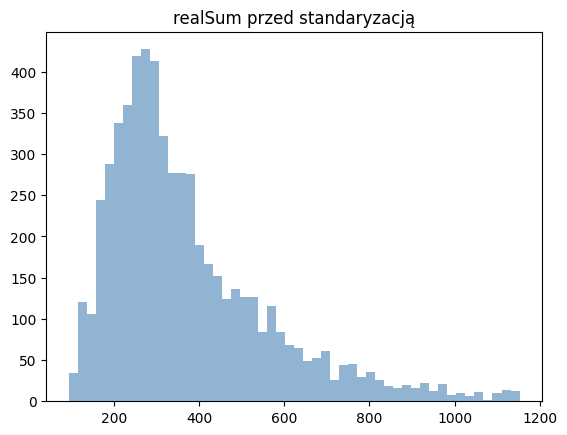

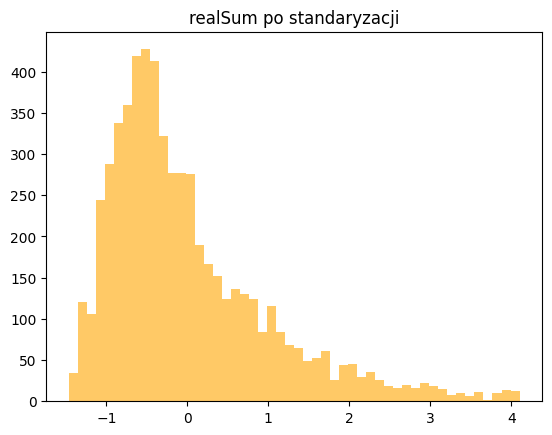

In [5]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
paris_all_std = paris_all_clean.copy()
paris_all_std[selected_columns] = scaler.fit_transform(paris_all_clean[selected_columns])

print("Combined dataset after standardization:")
print(paris_all_std[selected_columns].describe())

plt.hist(paris_all_clean['realSum'], bins=50, alpha=0.6, color='steelblue')
plt.title("realSum przed standaryzacją")
plt.show()

plt.hist(paris_all_std['realSum'], bins=50, alpha=0.6, color='orange')
plt.title("realSum po standaryzacji")
plt.show()

# Klasyfikacja Dzielnica

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

/home/washindeiru/.venv/md/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/washindeiru/.venv/md/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/washindeiru/.venv/md/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/washindeiru/.venv/m

Multiclass District Classification Results:
Accuracy: 0.3734

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.33      0.16      0.22        56
           3       0.45      0.90      0.59        77
           4       0.92      0.67      0.77        36
           5       0.00      0.00      0.00        42
           6       0.17      0.02      0.04        43
           7       0.00      0.00      0.00        30
           8       0.28      0.22      0.24        51
           9       0.38      0.52      0.44        77
          10       0.40      0.08      0.13        76
          11       0.32      0.76      0.45       114
          12       0.00      0.00      0.00        40
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00        45
          15       0.25      0.35      0.29        60
          16       0.79      0.90      0.84       

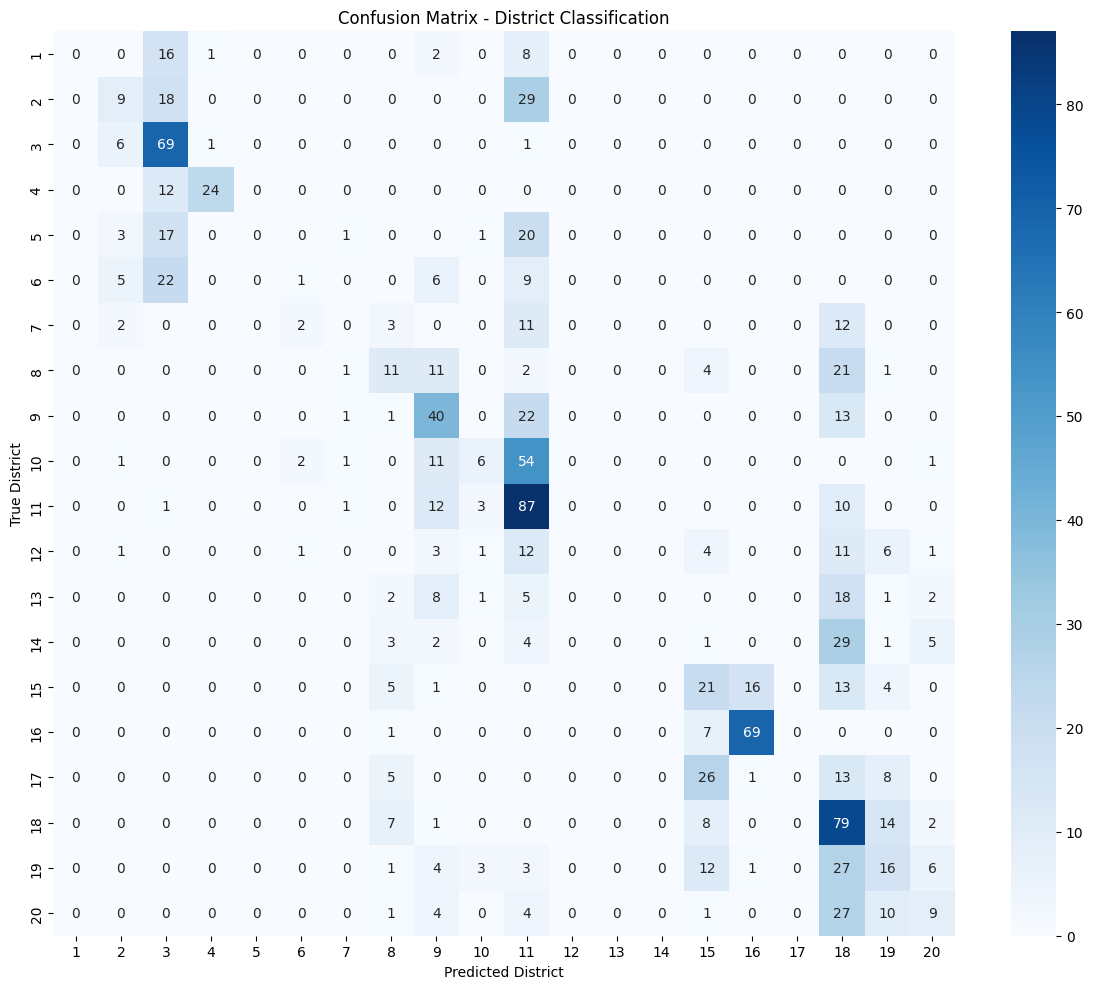


Feature Coefficients by District:
             guest_satisfaction_overall       dist   realSum
District 1                     0.112303  -5.871972  0.319608
District 2                    -0.064345  -4.681317  0.208051
District 3                    -0.101725  -7.932729  0.047342
District 4                     0.016786 -12.002414  0.160180
District 5                     0.023088  -4.981271  0.045341
District 6                     0.035681  -4.002813  0.324027
District 7                    -0.055107   1.095907  0.718504
District 8                    -0.050473   3.318913  0.767848
District 9                     0.083747   0.021684  0.205193
District 10                   -0.034429  -1.547015 -0.374286
District 11                    0.144849  -2.182160 -0.406297
District 12                    0.092789   1.668010 -0.289396
District 13                   -0.013373   0.504008 -0.401577
District 14                   -0.001778   2.735708 -0.243351
District 15                   -0.069038   7.067183

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

X = paris_all_clean[selected_columns]
y = paris_all_clean['district']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42, max_iter=1000, multi_class='multinomial')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Multiclass District Classification Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.xlabel('Predicted District')
plt.ylabel('True District')
plt.title('Confusion Matrix - District Classification')
plt.tight_layout()
plt.show()

print("\nFeature Coefficients by District:")
coef_df = pd.DataFrame(
    model.coef_,
    columns=selected_columns,
    index=[f'District {i}' for i in sorted(y.unique())]
)
print(coef_df)